# Project 3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hashlib import sha1

### Problem 1 (4 points)

Write a function called `sum_sine_plot` which takes input parameters `a`, `b`, `N` and `num` and plots the function 

$$
f(x) = \frac{1}{2} - \frac{1}{\pi} \sum_{k=1}^{N} \frac{(-1)^k}{k} \sin(2 \pi k x)
$$

over the interval $[a,b]$ using `num` equally spaced points from `a` to `b`. (In other words, use `np.linspace(a,b,num)` for the `x` values.) The function also returns the `x` and `y` values of the plot in a matrix with 2 columns with `x` values in the first column and `y` values in the second. The function `np.column_stack` may be helpful.

For example, the command

```
sum_sine_plot(0,5,20,500);
```

plots the figure

<img src="http://www.math.ubc.ca/~pwalls/data/prob1.png" style="width: 500px">

In [47]:
def sum_sine_plot(a,b,N,num):
    x = np.linspace(a,b,num)
    y = 1/2 - 1/np.pi * sum([(-1)**k / k * np.sin(2*np.pi*k*x) for k in range(1,N+1)])
    plt.plot(x,y)
    plt.show()
    return np.column_stack((x,y))

In [46]:
np.column_stack?

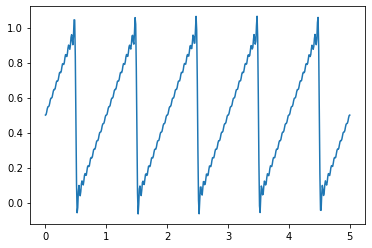

array([[ 0.        ,  0.5       ],
       [ 0.01002004,  0.50255818],
       [ 0.02004008,  0.51591838],
       [ 0.03006012,  0.53527268],
       [ 0.04008016,  0.54711141],
       [ 0.0501002 ,  0.54874133],
       [ 0.06012024,  0.5522649 ],
       [ 0.07014028,  0.56715505],
       [ 0.08016032,  0.58646829],
       [ 0.09018036,  0.59672293],
       [ 0.1002004 ,  0.59741877],
       [ 0.11022044,  0.60199214],
       [ 0.12024048,  0.61849487],
       [ 0.13026052,  0.63772164],
       [ 0.14028056,  0.64624646],
       [ 0.1503006 ,  0.64595463],
       [ 0.16032064,  0.65172446],
       [ 0.17034068,  0.67001655],
       [ 0.18036072,  0.68910117],
       [ 0.19038076,  0.6956344 ],
       [ 0.2004008 ,  0.69423682],
       [ 0.21042084,  0.70144491],
       [ 0.22044088,  0.72184456],
       [ 0.23046092,  0.74071098],
       [ 0.24048096,  0.74480284],
       [ 0.250501  ,  0.74207804],
       [ 0.26052104,  0.75113174],
       [ 0.27054108,  0.77420367],
       [ 0.28056112,

In [48]:
sum_sine_plot(0,5,20,500)

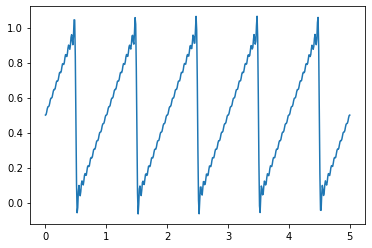

Problem 1 Test 1: Success!


In [49]:
"Check sum_sine_plot returns the correct datatype."
assert isinstance(sum_sine_plot(0,5,20,500),np.ndarray) , "Return value should be a NumPy array."
print("Problem 1 Test 1: Success!")

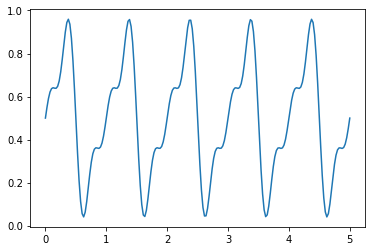

Problem 1 Test 2: Success!


In [51]:
"Check sum_sine_plot returns the correct size of NumPy array."
assert sum_sine_plot(0,5,3,200).shape == (200,2) , "Return value should be matrix with size num by 2."
print("Problem 1 Test 2: Success!")

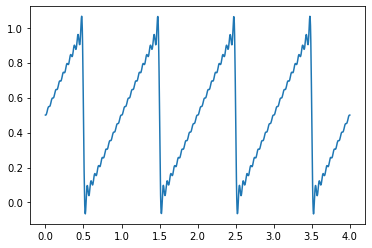

Problem 1 Test 3: Success!


In [52]:
"Check sum_sine_plot returns the correct values."
epsilon = 10e-7
M = sum_sine_plot(0,4,20,1000)
ans1 = np.array([[0.,0.5],[0.004004,0.50017506],[0.00800801,0.50134576]])
ans2 = np.array([[2.002002,0.5000221],[2.00600601,0.5005811],[2.01001001,0.50255093]])
ans3 = np.array([[3.99199199,0.49865424],[3.995996,0.49982494],[4.,0.5]])
assert np.max(np.abs(M[:3,:] - ans1)) < epsilon
assert np.max(np.abs(M[500:503,:] - ans2)) < epsilon
assert np.max(np.abs(M[-3:,:] - ans3)) < epsilon
print("Problem 1 Test 3: Success!")

### Problem 2 (6 points)

Write a function called `k_product` which takes an input parameter `N` and returns the product

$$
\prod_{k=1}^N \left( 1 - \frac{1}{(2k)^2} \right)
$$

Use the function `np.prod` with NumPy arrays. Note the infinite product is

$$
\prod_{k=1}^{\infty} \left( 1 - \frac{1}{(2k)^2} \right) = \frac{2}{\pi}
$$

In [75]:
def k_product(N):
    ary = np.array([1-1 / (2*k)**2 for k in range(1,N+1)])
    return np.prod(ary)

In [76]:
"Check that k_product returns the correct datatype."
assert isinstance(k_product(7),np.float64) , "Return value should be a NumPy float."
print("Problem 2 Test 1: Success!")

Problem 2 Test 1: Success!


In [77]:
"Check that k_product returns the correct values."
assert k_product(1) == 3/4 , "Return value should be 3/4 when N=1."
print("Problem 2 Test 2: Success!")

Problem 2 Test 2: Success!


In [78]:
"Check that k_product returns the correct values."
epsilon = 10e-5
assert np.abs(k_product(12) - 0.6494768875896284) < epsilon , "Return value should be 0.6494768875896284 when N=12."
print("Problem 2 Test 3: Success!")

Problem 2 Test 3: Success!


What is the smallest value $N$ which approximates $\frac{2}{\pi}$ with error less than 0.0001? Save your response to the variable $N$.

1592

In [89]:
N = 1592

In [90]:
"Check that N is the correct type."
assert isinstance(N,int) , "N should be an integer."
print("Problem 2 Test 4: Success!")

Problem 2 Test 4: Success!


In [91]:
"Check that N is the correct value."
assert sha1(str(N).encode('utf8')).hexdigest() == '348e495881ef4526fe8e38dba4ceaa49b829b8b2'
print("Problem 2 Test 5: Success!")

Problem 2 Test 5: Success!


### Problem 3 (5 points)

Write a function called `mn_cosine_integral` which takes input parameters `a`, `b`, `m`, `n` and `N` and returns the Riemann sum approximation (with midpoints and `N` subintervals) of the integral
$$
\int_a^b x^m \cos(nx) \, dx
$$

In [65]:
def f(x,m,n):
    return x**m * np.cos(n*x)

def mn_cosine_integral(a,b,m,n,N):
    dx = (b - a)/N
    a_1 = a+ (dx)/2
    y_val = [0]
    for p in range(0,N):
        y_val.append(f(a_1+ p * dx,m,n))
    return dx * sum(y_val)
    
    

In [70]:
mn_cosine_integral(0,2,4,0,10)

6.346760000000003

In [67]:
"Check that mn_cosine_integral returns the correct type."
assert isinstance(mn_cosine_integral(0,2,1,1,10),np.float64) , "Return type should be a NumPy float."
print("Problem 3 Test 1: Success!")

Problem 3 Test 1: Success!


In [68]:
"Check that mn_cosine_integral returns the correct values."
assert mn_cosine_integral(0,1,0,0,1) == 1
print("Problem 3 Test 2: Success!")

Problem 3 Test 2: Success!


In [69]:
"Check that mn_cosine_integral returns the correct values."
assert mn_cosine_integral(0,2,1,0,1) == 2
print("Problem 3 Test 3: Success!")

Problem 3 Test 3: Success!


##  Problem 4 (5 points)

Write a function called `Ei` which takes input parameters `b` and `max_error` and returns the approximation of the integral

$$
\int_1^b \frac{e^{-t}}{t} dt
$$

given by the trapezoid method with $N$ subintervals of equal length which guarantees the error is less than `max_error`.

In [82]:
def error(b,N):
    return ((b - 1)**3/(12*N**2))*(5/np.e)
    
def f(t):
    return np.e**(-t)/t    
    
def int_eval(b,N):
    dx = (b - 1)/N
    a = 1
    y_val = [0]
    for p in range(0,N):
        y_val.append(f(a + p * dx))
        y_val.append(f(a + (p+1) * dx))
    return (dx/2) * sum(y_val)

def Ei(b,max_error):
    N = 1
    while (error(b,N) > max_error):
        N = N + 1
    return np.float64(int_eval(b,N))   
        
        

In [83]:
np.float64?

In [84]:
"Check that Ei returns the correct type."
assert isinstance(Ei(2,0.001),np.float64) , "Return value should be a NumPy float."
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [85]:
"Check that Ei returns the correct values."
assert Ei(1,0.01) == 0
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


In [86]:
"Check that Ei returns the correct values."
epsilon = 10e-10
assert np.abs(Ei(5,0.001) - 0.21833350347126337) < epsilon
print("Problem 4 Test 3: Success!")

Problem 4 Test 3: Success!
